Carga de librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from datetime import datetime
import seaborn as sns

Carga del dataset

In [2]:
df=pd.read_csv('listas_musica.csv')

Limpieza de datos

In [3]:
df.isnull().sum()

date                  0
rank                  0
song                  0
artist                0
last-week         32312
peak-rank             0
weeks-on-board        0
dtype: int64

<Axes: >

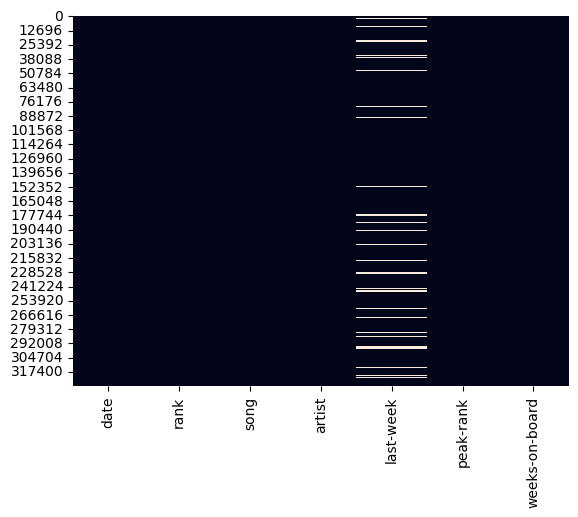

In [4]:
sns.heatmap(df.isnull()  , cbar=False) 

In [5]:
df = df.fillna(0)

<Axes: >

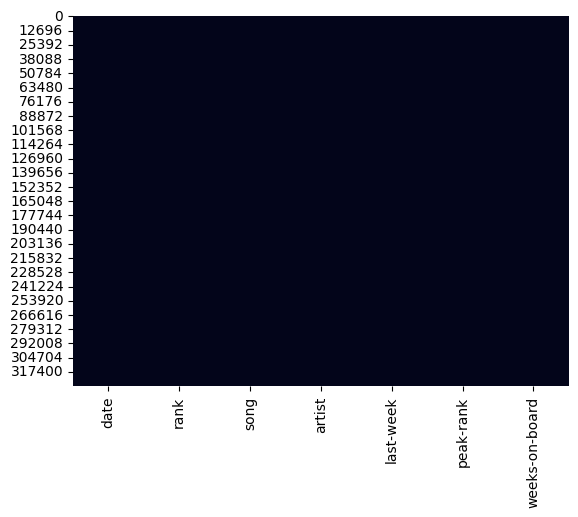

In [6]:
sns.heatmap(df.isnull(),cbar=False)

Imprima algunos valores de ejemplos¶
Use tail() para imprimir algunos valores.

Fíjese en las columnas del dataset.

In [7]:
df.tail(10)

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
330077,1958-08-04,91,The Purple People Eater Meets The Witch Doctor,Joe South,0.0,91,1
330078,1958-08-04,92,Bird Dog,The Everly Brothers,0.0,92,1
330079,1958-08-04,93,Are You Really Mine,Jimmie Rodgers,0.0,93,1
330080,1958-08-04,94,She Was Only Seventeen (He Was One Year More),Marty Robbins,0.0,94,1
330081,1958-08-04,95,Little Mary,Fats Domino,0.0,95,1
330082,1958-08-04,96,Over And Over,Thurston Harris,0.0,96,1
330083,1958-08-04,97,I Believe In You,Robert & Johnny,0.0,97,1
330084,1958-08-04,98,Little Serenade,The Ames Brothers,0.0,98,1
330085,1958-08-04,99,I'll Get By (As Long As I Have You),Billy Williams,0.0,99,1
330086,1958-08-04,100,Judy,Frankie Vaughan,0.0,100,1


Calcule los top 30 artistas

Puede usar la función value_counts() y head(...).

Fíjese en usar la columna correspondiente.

In [8]:
# En estas preguntas tomare los "mejores artistas o canciones " por la cantidad de veces q aparezcan 
df1=pd.DataFrame(df['artist'].value_counts().head(29))
df1 # TaylorSwift por encima de Elthon John .... Increible

,count
artist,
Taylor Swift,1023
Elton John,889
Madonna,857
Drake,787
Kenny Chesney,769
Tim McGraw,731
Keith Urban,673
Stevie Wonder,659
Rod Stewart,657


Muestre el top 15 de canciones junto con su cantante

In [9]:
df2=pd.DataFrame(df[['song','artist']].value_counts().head(15))
df2

,,count
song,artist,
Blinding Lights,The Weeknd,90
Radioactive,Imagine Dragons,87
Sail,AWOLNATION,79
I'm Yours,Jason Mraz,76
How Do I Live,LeAnn Rimes,69
Counting Stars,OneRepublic,68
Party Rock Anthem,LMFAO Featuring Lauren Bennett & GoonRock,68
Rolling In The Deep,Adele,65
Foolish Games/You Were Meant For Me,Jewel,65


In [10]:
# Otra forma de obtenerlo 
c = df.groupby(['song', 'artist']).size().reset_index(name='Conteo')
c = c.sort_values(by='Conteo', ascending=False)
cc = c.head(15)
cc

,song,artist,Conteo
2902,Blinding Lights,The Weeknd,90
19686,Radioactive,Imagine Dragons,87
20689,Sail,AWOLNATION,79
12210,I'm Yours,Jason Mraz,76
10284,How Do I Live,LeAnn Rimes,69
4666,Counting Stars,OneRepublic,68
18888,Party Rock Anthem,LMFAO Featuring Lauren Bennett & GoonRock,68
20402,Rolling In The Deep,Adele,65
7501,Foolish Games/You Were Meant For Me,Jewel,65
2497,Before He Cheats,Carrie Underwood,64


Muestre el top 10 de los artistas, canciones y su mejor posición

In [11]:
df3=pd.DataFrame(df[['song','artist','peak-rank']].value_counts().head(10))
df3

,,,count
song,artist,peak-rank,
Blinding Lights,The Weeknd,1,74
Shape Of You,Ed Sheeran,1,58
I'm Yours,Jason Mraz,6,56
I Gotta Feeling,The Black Eyed Peas,1,54
Party Rock Anthem,LMFAO Featuring Lauren Bennett & GoonRock,1,54
Can't Stop The Feeling!,Justin Timberlake,1,52
Shake It Off,Taylor Swift,1,50
Closer,The Chainsmokers Featuring Halsey,1,50
Circles,Post Malone,1,50


Artistas más reproducidos por semanas¶
Transforme la columna date en datetime.

Use set_index para crear un índice en la columna date.

Imprima el dataframe con el nuevo índice.

In [12]:
df_sem=df
df_sem.head(10)

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18
5,2021-11-06,6,Way 2 Sexy,Drake Featuring Future & Young Thug,6.0,1,8
6,2021-11-06,7,Shivers,Ed Sheeran,9.0,7,7
7,2021-11-06,8,Good 4 U,Olivia Rodrigo,7.0,1,24
8,2021-11-06,9,Need To Know,Doja Cat,11.0,9,20
9,2021-11-06,10,Levitating,Dua Lipa,8.0,2,56


In [13]:
df_sem['date']=pd.to_datetime(df_sem['date'])
df_sem.set_index('date', inplace = True)

In [14]:
df_sem

,rank,song,artist,last-week,peak-rank,weeks-on-board
date,,,,,,
2021-11-06,1,Easy On Me,Adele,1.0,1,3
2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18
...,...,...,...,...,...,...
1958-08-04,96,Over And Over,Thurston Harris,0.0,96,1
1958-08-04,97,I Believe In You,Robert & Johnny,0.0,97,1
1958-08-04,98,Little Serenade,The Ames Brothers,0.0,98,1


Encuentre los más y menos escuchados según un intervalo de tiempo

Puede usar resample(frecuencia)[columna].

Las frecuencias que puede usar son:


H - Horaria

D - Diaria

W - Semanal

M - Mensual

A - Anual

Puede usar .agg([columnas]) para agregar los datos

In [15]:
# cancion mas escuchada cada anho
df_sem.resample("Y").max()

,rank,song,artist,last-week,peak-rank,weeks-on-board
date,,,,,,
1958-12-31,100,¿Dònde Està Santa Claus? (Where Is Santa Claus?),Warren Storm,100.0,100,22
1959-12-31,100,¿Dònde Està Santa Claus? (Where Is Santa Claus?),Wink Martindale,100.0,100,26
1960-12-31,100,Your Other Love,Wink Martindale,100.0,100,27
1961-12-31,100,Your Other Love,Wyatt (Earp) McPherson,100.0,100,26
1962-12-31,100,Zip-A-Dee Doo-Dah,Yvonne Baker and the Sensations,100.0,100,39
...,...,...,...,...,...,...
2017-12-31,100,iSpy,twenty one pilots,100.0,100,52
2018-12-31,100,whoa (mind in awe),twenty one pilots,100.0,100,59
2019-12-31,100,whoa (mind in awe),j-hope Featuring Becky G.,100.0,100,53


In [16]:
#cancion menos escuchada cada anho
df_sem.resample("Y").min()

,rank,song,artist,last-week,peak-rank,weeks-on-board
date,,,,,,
1958-12-31,1,(All of a Sudden) My Heart Sings,Andy Rose,0.0,1,1
1959-12-31,1,"""Yep!""",5 Satins,0.0,1,1
1960-12-31,1,(Baby) Hully Gully,100 Strings and Jono (Choir of 40 Voices),0.0,1,1
1961-12-31,1,'Til,Ace Cannon,0.0,1,1
1962-12-31,1,'Til,Ace Cannon,0.0,1,1
...,...,...,...,...,...,...
2017-12-31,1,...Ready For It?,2 Chainz Featuring Travis Scott,0.0,1,1
2018-12-31,1,(There's No Place Like) Home For The Holidays,2 Chainz Featuring YG & Offset,0.0,1,1
2019-12-31,1,(There's No Place Like) Home For The Holidays,2 Chainz Featuring Ariana Grande,0.0,1,1


In [17]:
#cancion mas escuchada por mes 
df_sem.resample("M").max()

,rank,song,artist,last-week,peak-rank,weeks-on-board
date,,,,,,
1958-08-31,100,Young And Warm And Wonderful,Warren Storm,100.0,100,4
1958-09-30,100,Your Cheatin' Heart,Warren Storm,100.0,100,9
1958-10-31,100,You Cheated,Tony Bennett,100.0,100,13
1958-11-30,100,You Cheated,Tony Bennett,100.0,100,17
1958-12-31,100,¿Dònde Està Santa Claus? (Where Is Santa Claus?),Wade Flemons and the Newcomers,100.0,100,22
...,...,...,...,...,...,...
2021-07-31,100,transparentsoul,Young Thug & Gunna,100.0,100,85
2021-08-31,100,my.life,"Yung Bleu, Chris Brown & 2 Chainz",100.0,100,89
2021-09-30,100,You Time,"Yung Bleu, Chris Brown & 2 Chainz",100.0,99,90


In [18]:
# cancion menos escuchada por mes
df_sem.resample("M").max()

,rank,song,artist,last-week,peak-rank,weeks-on-board
date,,,,,,
1958-08-31,100,Young And Warm And Wonderful,Warren Storm,100.0,100,4
1958-09-30,100,Your Cheatin' Heart,Warren Storm,100.0,100,9
1958-10-31,100,You Cheated,Tony Bennett,100.0,100,13
1958-11-30,100,You Cheated,Tony Bennett,100.0,100,17
1958-12-31,100,¿Dònde Està Santa Claus? (Where Is Santa Claus?),Wade Flemons and the Newcomers,100.0,100,22
...,...,...,...,...,...,...
2021-07-31,100,transparentsoul,Young Thug & Gunna,100.0,100,85
2021-08-31,100,my.life,"Yung Bleu, Chris Brown & 2 Chainz",100.0,100,89
2021-09-30,100,You Time,"Yung Bleu, Chris Brown & 2 Chainz",100.0,99,90


In [19]:
data=df

Esta seria otra forma , al final aparecera una columna con el año y otra con la cancion mas escuchada ese año

In [20]:
df=pd.read_csv('listas_musica.csv')

In [21]:
df['date'] = pd.to_datetime(df['date'])
df['Año'] = df['date'].dt.year
dfagg = df.groupby('Año')['song'].value_counts().reset_index(name='Cantidad')
can_esc = dfagg.groupby('Año').apply(lambda x: x.nlargest(1, 'Cantidad')).reset_index(drop=True)
can_esc = can_esc.rename(columns={'song': 'Cancion Mas Escuchada'})
df = pd.merge(df, can_esc[['Año', 'Cancion Mas Escuchada']], on='Año')


In [22]:
df

,date,rank,song,artist,last-week,peak-rank,weeks-on-board,Año,Cancion Mas Escuchada
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3,2021,Levitating
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16,2021,Levitating
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14,2021,Levitating
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19,2021,Levitating
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18,2021,Levitating
...,...,...,...,...,...,...,...,...,...
330082,1958-08-04,96,Over And Over,Thurston Harris,NaN,96,1,1958,You Cheated
330083,1958-08-04,97,I Believe In You,Robert & Johnny,NaN,97,1,1958,You Cheated
330084,1958-08-04,98,Little Serenade,The Ames Brothers,NaN,98,1,1958,You Cheated
330085,1958-08-04,99,I'll Get By (As Long As I Have You),Billy Williams,NaN,99,1,1958,You Cheated
